<a href="https://colab.research.google.com/github/taniahdez75/st/blob/main/Wine_Univariate_and_Bivariate_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import basic libraries
import numpy as np 
import pandas as pd 
# import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('winequality-white.csv', sep=';')

Lets take a quick look at our dataset

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


As we can see, there are 4898 records (rows) and 12 parameters (columns). Let's check for NULLs.

In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No null values. I am very happy. Lets check both quality and pH for their range.

In [ ]:
str(sorted(df['quality'].unique()))

'[3, 4, 5, 6, 7, 8, 9]'

No values fall below 3 or above 9

In [ ]:
df['pH'].min()

2.72

In [ ]:
df['pH'].max()

3.82

Our range within the pH column is limited to 1.1. Let's add a column explaining the quality as either being Poor or Good.

In [ ]:
quality_cat=[]
for i in df['quality']:
  if i <= 6:
    quality_cat.append('Poor')
  else:
    quality_cat.append('Good')

In [ ]:
print(quality_cat)

['Poor', 'Poor', 'Poor', 'Poor', 'Poor', 'Poor', 'Poor', 'Poor', 'Poor', 'Poor', 'Poor', 'Poor', 'Poor', 'Good', 'Poor', 'Good', 'Poor', 'Good', 'Poor', 'Poor', 'Good', 'Good', 'Good', 'Poor', 'Poor', 'Poor', 'Poor', 'Poor', 'Poor', 'Good', 'Poor', 'Poor', 'Poor', 'Poor', 'Poor', 'Poor', 'Poor', 'Poor', 'Poor', 'Poor', 'Poor', 'Poor', 'Poor', 'Poor', 'Poor', 'Good', 'Poor', 'Poor', 'Poor', 'Poor', 'Poor', 'Good', 'Good', 'Poor', 'Poor', 'Poor', 'Poor', 'Poor', 'Poor', 'Poor', 'Poor', 'Poor', 'Poor', 'Poor', 'Poor', 'Poor', 'Good', 'Poor', 'Good', 'Poor', 'Poor', 'Poor', 'Poor', 'Poor', 'Good', 'Poor', 'Good', 'Good', 'Poor', 'Poor', 'Poor', 'Poor', 'Poor', 'Poor', 'Poor', 'Poor', 'Poor', 'Poor', 'Poor', 'Poor', 'Poor', 'Poor', 'Good', 'Good', 'Good', 'Poor', 'Poor', 'Good', 'Poor', 'Poor', 'Poor', 'Poor', 'Poor', 'Poor', 'Poor', 'Poor', 'Poor', 'Poor', 'Poor', 'Poor', 'Poor', 'Poor', 'Poor', 'Poor', 'Poor', 'Poor', 'Poor', 'Poor', 'Poor', 'Poor', 'Poor', 'Poor', 'Poor', 'Poor', 'Poor',

In [ ]:
df['quality_cat'] = quality_cat

Let's make sure that it's working as intended.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
 12  quality_cat           4898 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 497.6+ KB


In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_cat
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,Poor
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,Poor
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,Poor
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Poor
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Poor


Let's get an idea of how many wines are poor vs good using sns.

<Axes: ylabel='count'>

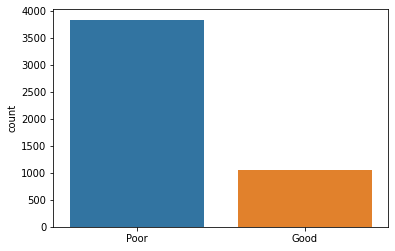

In [ ]:
sns.countplot(x=quality_cat, data=df)

In [ ]:
round(df['quality_cat'].value_counts()/len(df),4)

Poor    0.7836
Good    0.2164
Name: quality_cat, dtype: float64

As you can see Poor quality wines make up about 78.36% of all our wines. While Good quality wines only make up 21.64% of our wines.

In [ ]:
pH_cat = []
for i in df['pH']:
  if i >= 3.27:
    pH_cat.append('Base')
  else:
    pH_cat.append('Acidic')

print(pH_cat)

['Acidic', 'Base', 'Acidic', 'Acidic', 'Acidic', 'Acidic', 'Acidic', 'Acidic', 'Base', 'Acidic', 'Acidic', 'Acidic', 'Acidic', 'Base', 'Acidic', 'Acidic', 'Acidic', 'Base', 'Acidic', 'Acidic', 'Base', 'Acidic', 'Base', 'Acidic', 'Base', 'Acidic', 'Base', 'Base', 'Acidic', 'Acidic', 'Acidic', 'Base', 'Acidic', 'Base', 'Base', 'Acidic', 'Acidic', 'Acidic', 'Acidic', 'Acidic', 'Acidic', 'Acidic', 'Acidic', 'Acidic', 'Acidic', 'Acidic', 'Base', 'Acidic', 'Acidic', 'Base', 'Base', 'Base', 'Base', 'Base', 'Acidic', 'Acidic', 'Acidic', 'Base', 'Acidic', 'Base', 'Acidic', 'Base', 'Acidic', 'Acidic', 'Acidic', 'Acidic', 'Acidic', 'Acidic', 'Base', 'Acidic', 'Acidic', 'Base', 'Base', 'Acidic', 'Base', 'Acidic', 'Acidic', 'Base', 'Acidic', 'Base', 'Base', 'Acidic', 'Acidic', 'Base', 'Acidic', 'Acidic', 'Acidic', 'Acidic', 'Acidic', 'Acidic', 'Acidic', 'Acidic', 'Acidic', 'Acidic', 'Acidic', 'Acidic', 'Acidic', 'Acidic', 'Acidic', 'Acidic', 'Acidic', 'Base', 'Base', 'Acidic', 'Acidic', 'Acidic', '

In [ ]:
df['pH_cat'] = pH_cat

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_cat,pH_cat
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,Poor,Acidic
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,Poor,Base
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,Poor,Acidic
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Poor,Acidic
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Poor,Acidic


In [ ]:
round(df['pH_cat'].value_counts()/len(df),4)

Acidic    0.7229
Base      0.2771
Name: pH_cat, dtype: float64

Mode acidic wines make up about 72.29% of the total wines. Making them the predominant pH category. Lets see how pH and quality compare to one another.

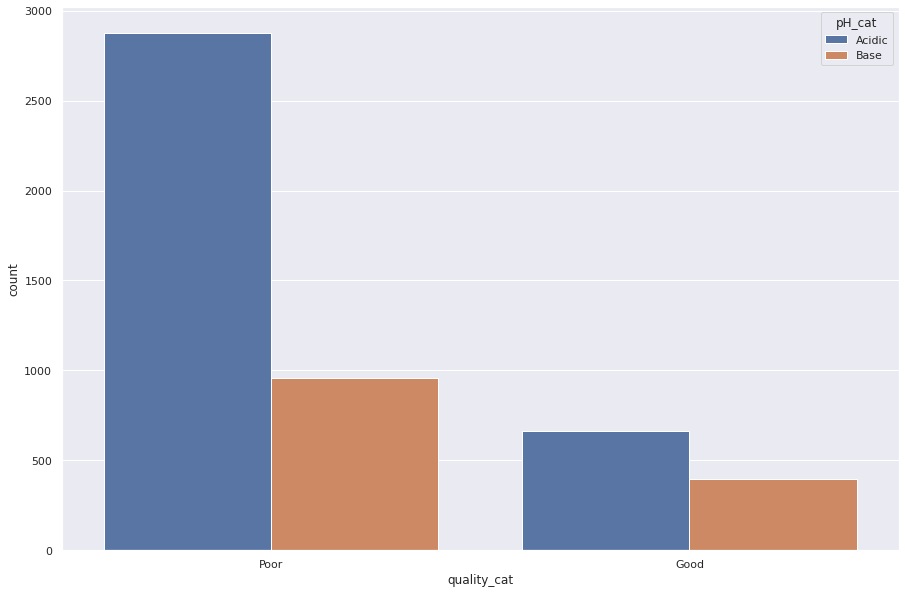

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})
edu = sns.countplot(x='quality_cat', hue='pH_cat', data=df)
edu.set_xticklabels(['Poor','Good'])
plt.show()

In [ ]:
pd.crosstab(df.quality_cat,df.pH_cat,normalize='index',margins=True)

pH_cat,Acidic,Base
quality_cat,,
Good,0.625472,0.374528
Poor,0.749870,0.250130
All,0.722948,0.277052


In [ ]:
sns.set(rc={'figure.figsize':(30,10)})
sns.set_context("talk", font_scale=0.7)

sns.heatmap(df.iloc[:,1:].corr(method='spearman'), cmap='rainbow_r', annot=True)